<a href="https://www.kaggle.com/code/hoshimmardonov1/pnevmonia-tashxisi?scriptVersionId=128296239" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# kutubxonalarni yuklab olish
import torch
import fastai

# versiyalarini tekshirish
print(torch.__version__)
print(fastai.__version__)

2.0.0
2.7.12


In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
# kutubxonlar
from fastai.vision.all import *
from ipywidgets import widgets
import cv2
path = Path("/kaggle/input/tayyor/yuklash_uchun/train")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
(path).ls()

(#2) [Path('/kaggle/input/tayyor/yuklash_uchun/train/PNEUMANIA'),Path('/kaggle/input/tayyor/yuklash_uchun/train/NORMAL')]

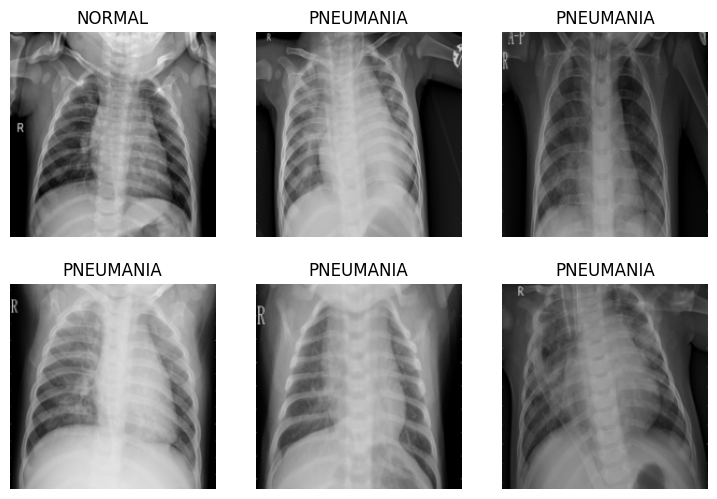

In [5]:
dls=DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [6]:
from fastai import metrics
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(5)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61

epoch,train_loss,valid_loss,accuracy,time
0,0.345612,0.473284,0.893536,01:15


epoch,train_loss,valid_loss,accuracy,time
0,0.130422,0.152244,0.965779,01:09
1,0.092300,0.136170,0.979087,01:09
2,0.055153,0.086895,0.984791,01:09
3,0.032763,0.058184,0.990494,01:09
4,0.017242,0.059348,0.986692,01:10


In [7]:
sample = pd.read_csv("/kaggle/input/tayyor/yuklash_uchun/sample_solution.csv")
sample.shape

(624, 2)

In [8]:
test_path = "/kaggle/input/tayyor/yuklash_uchun/test/"
for i in range(0,624):
    label = sample.iloc[i,0]
    img = Path(f'{test_path + label}')
    pred, _, _ = learn.predict(img)
    if pred == "NORMAL":
        sample.iloc[i,1] = 0
    else: sample.iloc[i,1] = 1

In [9]:
sample.to_csv("Alhamdulillah.csv", index=False)